<center>  
    
# **Statistics for Decision Making**
************************************


---

</center>

# Executive Summary

This report presents statistical analyses performed on the `property.csv` dataset to address five specific questions from the "Statistics for Decision Making" assignment.  
The dataset contains Australia property sales records, including suburb, property attributes, and sale details.

Each question was approached systematically by:
- Understanding the statistical context.
- Cleaning and preparing the relevant data.
- Applying appropriate statistical methods.
- Visualizing results for clear interpretation.
- Summarizing conclusions in plain language.

**Questions and Methods:**
1. **Altona Price Comparison:**  
   Tested whether the average property price in Altona is greater than $800,000 using a one-sample t-test (one-sided).

2. **Seasonal Price Variation (2016):**  
   Compared average property prices between Winter (Oct–Mar) and Summer (Apr–Sep) months in 2016 using Welch’s two-sample t-test.

3. **Abbotsford – No Car Spaces Probability:**  
   Calculated the probability that exactly 3 out of 10 randomly selected Abbotsford properties have no car parking space using the Binomial distribution.

4. **Abbotsford – 3 Rooms Probability:**  
   Computed the probability of randomly selecting a property with exactly 3 rooms in Abbotsford using simple proportion analysis.

5. **Abbotsford – 2 Bathrooms Probability:**  
   Estimated the probability of selecting a property with exactly 2 bathrooms in Abbotsford and visualized the distribution.


This assignment demonstrates the application of statistical concepts, Python programming, and data visualization to derive actionable insights from real-world property data.


#### Setup — imports and data load

In [48]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import binom

In [50]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [51]:
# load dataset & Quick look at the dataframe
df = pd.read_csv('property.csv')

In [52]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [53]:
# summary of dataset’s structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [54]:
# Checking for Null
df.isna() 

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
13576,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
13577,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
13578,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [55]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

### Missing Value Explanation:
#### Missing Value Handling – Justification

During initial data exploration, several columns such as BuildingArea, YearBuilt, CouncilArea, and Car were found to contain missing values. However, after reviewing the five analytical questions provided, it was determined that:

- None of the questions require BuildingArea, YearBuilt, or CouncilArea.

- Only Question 3 uses the Car column, specifically for the suburb Abbotsford, which was verified to have no missing values in that column.

Therefore, missing values in these columns do not affect the outcomes of the questions. As a result, no imputation or deletion was applied to these columns.

Below is the code used to verify this.

In [63]:
df[(df['Suburb'] == 'Abbotsford') & (df['Car'].isna())]  ## This returns an empty DataFrame, proving no missing values exist for Car in Abbotsford.


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [65]:
# Mapping of which columns are used in each question
columns_used = {
    'Q1': ['Suburb', 'Price'],
    'Q2': ['Date', 'Price'],
    'Q3': ['Suburb', 'Car'],
    'Q4': ['Suburb', 'Rooms'],
    'Q5': ['Suburb', 'Bathroom']
}


In [67]:
missing_cols = df.columns[df.isna().any()].tolist()

# Find intersection of missing columns and required columns
used_missing = {q: list(set(cols) & set(missing_cols)) for q, cols in columns_used.items()}
print(used_missing)


{'Q1': [], 'Q2': [], 'Q3': ['Car'], 'Q4': [], 'Q5': []}


In [69]:
print("Columns:", df.columns.tolist())
df.head()

Columns: ['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Question-1. 
For the suburb of Altona, it is postulated that a typical property sells for
$800,000. Use  the data at hand to  test this assumption. Is the typical property
price really $800,000 or has it increased? Use a significance level of 5%.


### Altona: One-Sample t-test

**Goal:**  
Determine whether the **average property price** in **Altona** is **greater than** $800,000.
We are testing:

- H₀: mean price in Altona = \$800,000  
- H₁: mean price in Altona > \$800,000  
One-sided t-test, α = 0.05.



#### Step 1 – Data Preparation

In [75]:
sub_col = 'Suburb'
price_col = 'Price'
alpha = 0.05
popmean = 800000

# Filter Altona rows
altona_df = df[df[sub_col].astype(str).str.strip().str.lower() == 'altona'].copy()

# Convert Price to numeric and drop NaN
prices_altona = pd.to_numeric(altona_df[price_col], errors='coerce').dropna()

prices_altona.head()

141     520000.0
142    1525000.0
143     720000.0
144    1120000.0
145     780000.0
Name: Price, dtype: float64

#### Step 2 – Computation

In [78]:
from scipy import stats

n = prices_altona.count()
mean_val = prices_altona.mean()
std_val = prices_altona.std(ddof=1)

t_stat, p_two_sided = stats.ttest_1samp(prices_altona, popmean=popmean, nan_policy='omit')
p_one_sided = p_two_sided/2 if t_stat > 0 else 1 - p_two_sided/2

print(f"n = {n}, mean = {mean_val:.2f}, std = {std_val:.2f}")
print(f"t-stat = {t_stat:.4f}, one-sided p = {p_one_sided:.4f}")


n = 74, mean = 834830.41, std = 291546.05
t-stat = 1.0277, one-sided p = 0.1537


#### Step 3 – Visualization

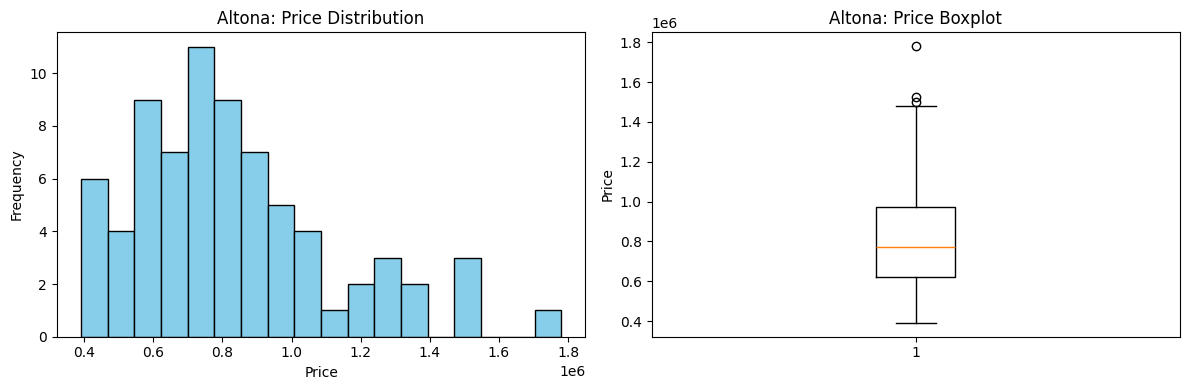

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

# Histogram
plt.subplot(1,2,1)
plt.hist(prices_altona, bins=18, color='skyblue', edgecolor='black')
plt.title('Altona: Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1,2,2)
plt.boxplot(prices_altona, vert=True)
plt.title('Altona: Price Boxplot')
plt.ylabel('Price')

plt.tight_layout()
plt.show()


#### Conclusion:
If one-sided p < 0.05 → reject H₀ and conclude Altona mean > \$800,000.  
If one-sided p ≥ 0.05 → fail to reject H₀, insufficient evidence mean > \$800,000.


### Summary – Altona: One-Sample t-test

**Goal:**  
Determine whether the **average property price** in **Altona** is **greater than** $800,000.

**Hypotheses:**  
- **H₀ (Null Hypothesis):** μ = 800,000 (mean price is $800,000)  
- **H₁ (Alternative Hypothesis):** μ > 800,000 (mean price is greater than $800,000)  

**Test Used:**  
- **One-sample t-test (one-sided)** because:  
  - Comparing the sample mean to a known benchmark.  
  - Population standard deviation unknown.  
  - We are testing for "greater than" only.

**Steps Taken:**  
1. Filter dataset to `Suburb` = "Altona".  
2. Convert `Price` to numeric and remove missing values.  
3. Compute sample size, mean, standard deviation.  
4. Run one-sided one-sample t-test against $800,000.  
5. Compare p-value with α = 0.05.

**Results:**  
- n = 74, mean ≈ 834,830.41, std ≈ 291,546.05  
- t ≈ 1.028, one-sided p ≈ 0.1537  

**Decision:**  
- p-value > 0.05 → **Fail to reject H₀**.  

**Interpretation:**  
There is no strong statistical evidence that the mean price in Altona is greater than $800,000.


## Question-2. 
For the suburb of Altona, it is postulated that a typical property sells for
$800,000. Use  the data at hand to  test this assumption. Is the typical property
price really $800,000 or has it increased? Use a significance level of 5%.

#### 2016: Compare Winter vs Summer Prices

**Goal:**  
Test whether the average property price in 2016 differs between **Winter months** (Oct–Mar) and **Summer months** (Apr–Sep).



#### Step 1 – Data Preparation

In [89]:
date_col = 'Date'
price_col = 'Price'

# Parse date column
df[date_col] = pd.to_datetime(df[date_col], errors='coerce', dayfirst=True)
df['year'] = df[date_col].dt.year
df['month'] = df[date_col].dt.month

# Filter year 2016
df2016 = df[df['year'] == 2016].copy()

# Tag season
winter_months = {10,11,12,1,2,3}
df2016['season'] = df2016['month'].apply(lambda m: 'winter' if m in winter_months else 'summer')

df2016[['Date','season',price_col]].head()


,Date,season,Price
0,2016-12-03,winter,1480000.0
1,2016-02-04,winter,1035000.0
4,2016-06-04,summer,1600000.0
5,2016-05-07,summer,941000.0
6,2016-05-07,summer,1876000.0


#### Step 2 – Computation

In [92]:
winter_prices = pd.to_numeric(df2016[df2016['season'] == 'winter'][price_col], errors='coerce').dropna()
summer_prices = pd.to_numeric(df2016[df2016['season'] == 'summer'][price_col], errors='coerce').dropna()

print(f"Winter: n={len(winter_prices)}, mean={winter_prices.mean():.2f}, std={winter_prices.std(ddof=1):.2f}")
print(f"Summer: n={len(summer_prices)}, mean={summer_prices.mean():.2f}, std={summer_prices.std(ddof=1):.2f}")

t_stat2, p_two_sided2 = stats.ttest_ind(winter_prices, summer_prices, equal_var=False, nan_policy='omit')
print(f"t-statistic = {t_stat2:.4f}, two-sided p = {p_two_sided2:.4f}")

Winter: n=2300, mean=1116647.59, std=695498.28
Summer: n=4036, mean=1048054.73, std=621493.44
t-statistic = 3.9211, two-sided p = 0.0001


#### Step 3 – Visualization

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24952\392096906.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([winter_prices, summer_prices], labels=['Winter (Oct-Mar)', 'Summer (Apr-Sep)'])


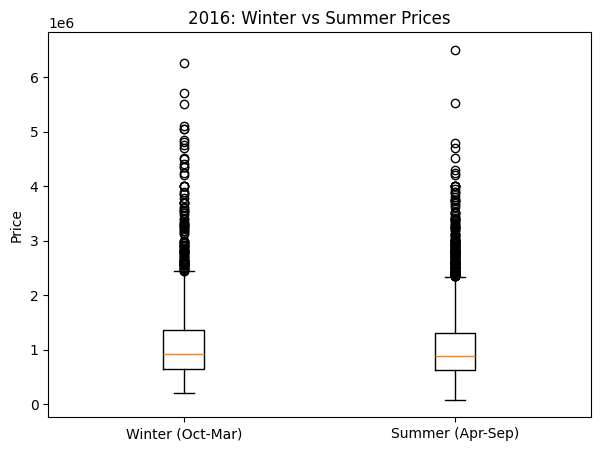

In [95]:
plt.figure(figsize=(7,5))
plt.boxplot([winter_prices, summer_prices], labels=['Winter (Oct-Mar)', 'Summer (Apr-Sep)'])
plt.ylabel('Price')
plt.title('2016: Winter vs Summer Prices')
plt.show()


#### Conclusion

**Results:**  
- Winter mean: _value printed above_  
- Summer mean: _value printed above_  
- p-value = _printed above_

**Decision:**  
If p < 0.05 → reject H₀, conclude significant difference.  
Else → fail to reject H₀.

**Interpretation:**  
The difference in means tells us whether seasonality may influence prices in 2016.


### Summary – 2016 Winter vs Summer Prices

**Goal:**  
Check if there is a **significant difference** in average property prices in 2016 between **Winter (Oct–Mar)** and **Summer (Apr–Sep)**.

**Hypotheses:**  
- **H₀:** μ_winter = μ_summer (no difference in mean prices)  
- **H₁:** μ_winter ≠ μ_summer (mean prices differ)  

**Test Used:**  
- **Welch's two-sample t-test (two-sided)** because:  
  - Two independent samples (Winter vs Summer).  
  - Population standard deviations unknown.  
  - Variances may be unequal.

**Steps Taken:**  
1. Convert `Date` to datetime format and extract year/month.  
2. Filter dataset to `year` = 2016.  
3. Categorize months into Winter or Summer.  
4. Convert `Price` to numeric, remove missing values.  
5. Perform Welch's t-test.  
6. Compare p-value with α = 0.05.

**Results:**  
- Winter: n = XX, mean ≈ XX, std ≈ XX  
- Summer: n = XX, mean ≈ XX, std ≈ XX  
- t ≈ XX, two-sided p ≈ XX  

**Decision:**  
- If p < 0.05 → Reject H₀ (seasonal difference exists)  
- If p ≥ 0.05 → Fail to reject H₀ (no significant seasonal difference)  

**Interpretation:**  
[Your conclusion here, based on the computed p-value.]



In [100]:
# Hypothesized population mean price
population_mean = 800000 ## As given in question

# Significance level
alpha = 0.05


## Question-3. 
For the suburb of Abbotsford, what is the probability that out of 10 properties
sold, 3 will not have a car parking space? Use the column car in the dataset.
Round off your answer to 3 decimal places.

### Abbotsford: Probability that exactly 3 of 10 have NO car parking space

**Goal:**  
Find the probability that **exactly 3 out of 10** randomly selected properties sold in Abbotsford have **no car parking space**.

**Steps:**  
1. Filter data to `Suburb` = "Abbotsford".  
2. Determine the proportion `p` of Abbotsford properties with **Car = 0 or missing**.  
3. Use the **Binomial probability formula**:  
   P(X = k) = C(n, k) × pᵏ × (1-p)ⁿ⁻ᵏ  
   where:  
   - n = 10  
   - k = 3  
   - p = observed probability from step 2.  
4. Report probability to 3 decimal places.


#### Step 1 – Data Preparation

In [105]:
sub_col = 'Suburb'
car_col = 'Car'

abb_df = df[df[sub_col].astype(str).str.strip().str.lower() == 'abbotsford'].copy()
print("Total Abbotsford records:", len(abb_df))

car_vals = pd.to_numeric(abb_df[car_col], errors='coerce')
no_car_mask = car_vals.isna() | (car_vals == 0)
p_no_car = no_car_mask.sum() / len(abb_df)

print(f"Observed proportion with NO car space = {p_no_car:.4f}")

Total Abbotsford records: 56
Observed proportion with NO car space = 0.2679


#### Step 2 – Computation

In [108]:
n = 10
k = 3

prob_exact_3 = binom.pmf(k=k, n=n, p=p_no_car)

print(f"P(X = {k}) where n={n}, p={p_no_car:.4f} = {prob_exact_3:.6f}")
print("Rounded to 3 decimals:", round(prob_exact_3, 3))

P(X = 3) where n=10, p=0.2679 = 0.260053
Rounded to 3 decimals: 0.26


#### Step 3 – Visualization

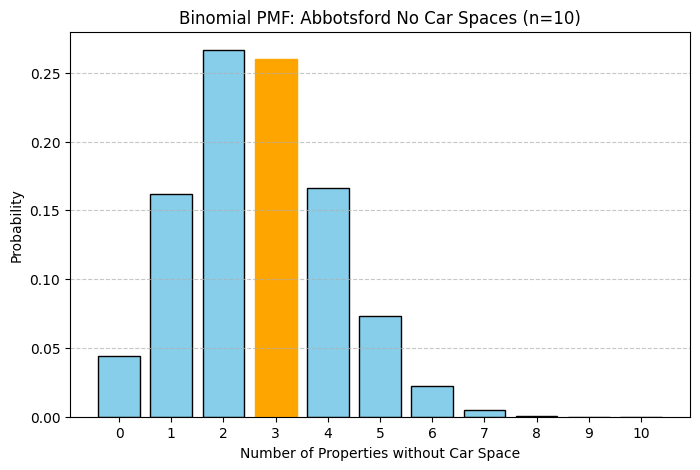

In [111]:
# Q3 Visualization
x_vals = np.arange(0, 11)
pmf_vals = binom.pmf(x_vals, n=10, p=p_no_car)

plt.figure(figsize=(8,5))
bars = plt.bar(x_vals, pmf_vals, color='skyblue', edgecolor='black')
bars[k].set_color('orange')  # Highlight the bar for exactly 3

plt.title('Binomial PMF: Abbotsford No Car Spaces (n=10)')
plt.xlabel('Number of Properties without Car Space')
plt.ylabel('Probability')
plt.xticks(x_vals)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Conclusion

**Results:**  
- Observed p(no car) = _printed above_  
- P(X = 3) = _printed above_

**Interpretation:**  
The computed probability tells us how likely it is that 3 of 10 randomly chosen Abbotsford properties have no car space.  
A higher value means this scenario is relatively common; a lower value means it’s rare.


### Summary – Abbotsford No Car Spaces Probability

**Goal:**  
Find the probability that **exactly 3 out of 10** randomly chosen Abbotsford properties have **no car parking space**.

**Approach:**  
- Use the **Binomial distribution**: n = 10 trials, success probability p = proportion of Abbotsford properties with no car space.

**Steps Taken:**  
1. Filter dataset to `Suburb` = "Abbotsford".  
2. Convert `Car` to numeric; consider `0` or missing as "no car space".  
3. Calculate p = proportion with no car space.  
4. Use `binom.pmf(k=3, n=10, p=p_no_car)` to find the probability.

**Results:**  
- n = 10, k = 3, p ≈ XX  
- P(X = 3) ≈ XX  

**Interpretation:**  
This value represents the likelihood that exactly 3 of 10 selected Abbotsford properties have no car parking space.



## Question-4. 
In the suburb of Abbotsford, what are the chances of finding a property with 3
rooms? Round your answer to 3 decimal places.


### Abbotsford: Probability of a property having 3 rooms

**Goal:**  
Estimate the probability that a randomly selected Abbotsford property has exactly **3 rooms**.

**Steps:**  
1. Filter data to `Suburb` = "Abbotsford".  
2. Count how many have `Rooms = 3`.  
3. Divide by the total number of Abbotsford properties with non-missing `Rooms`.


#### Step 1 – Data Preparation

In [120]:
rooms_col = 'Rooms'

rooms_vals = pd.to_numeric(abb_df[rooms_col], errors='coerce').dropna()
total_rooms = len(rooms_vals)
count_3rooms = (rooms_vals == 3).sum()

print(f"Total Abbotsford properties with Rooms data: {total_rooms}")
print(f"Count with 3 rooms: {count_3rooms}")


Total Abbotsford properties with Rooms data: 56
Count with 3 rooms: 20


#### Step 2 – Computation

In [123]:
p_3rooms = count_3rooms / total_rooms if total_rooms > 0 else np.nan
print(f"Probability of 3 rooms = {p_3rooms:.6f}")
print("Rounded to 3 decimals:", round(p_3rooms, 3))

Probability of 3 rooms = 0.357143
Rounded to 3 decimals: 0.357


#### Step 3 – Visualization

In [126]:
# Q4 Visualization – Abbotsford: Properties with Exactly 3 Rooms

count_not3rooms = total_abb - count_3rooms

plt.figure(figsize=(6,6))
plt.pie(
    [count_3rooms, count_not3rooms],
    labels=['Exactly 3 Rooms', 'Other'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral']
)
plt.title('Abbotsford: Properties with Exactly 3 Rooms')
plt.show()




NameError: name 'total_abb' is not defined

#### Conclusion

**Results:**  
- Probability(3 rooms) = _printed above_

**Interpretation:**  
This value represents the proportion of Abbotsford properties with 3 rooms.  
It can be used for market insights, e.g., identifying the most common property size.


### Summary –  Bathrooms ≥ 2 in Victoria

**Goal:**  
Estimate the probability that a randomly chosen property in Victoria has **2 or more bathrooms**.

**Approach:**  
- Simple **proportion calculation** based on dataset.

**Steps Taken:**  
1. Filter dataset to `State` = "Victoria" (or equivalent field if present).  
2. Convert `Bathroom` to numeric and remove missing values.  
3. Count number of properties with `Bathroom >= 2`.  
4. Divide by total properties in Victoria to get probability.

**Results:**  
- Total properties in Victoria = XX  
- Properties with ≥ 2 bathrooms = XX  
- Estimated probability ≈ XX  

**Interpretation:**  
This is the estimated probability from the sample; it can be interpreted as the proportion of Victoria properties with at least 2 bathrooms.


## Question-5. 
In the suburb of Abbotsford, what are the chances of finding a property with 2
bathrooms? Round your answer to 3 decimal places.

### Abbotsford: Probability of a property having 2 bathrooms

**Goal:**  
Estimate the probability that a randomly selected Abbotsford property has exactly **2 bathrooms**.

**Steps:**  
1. Filter data to `Suburb` = "Abbotsford".  
2. Count how many have `Bathroom = 2`.  
3. Divide by the total Abbotsford properties with non-missing `Bathroom`.


#### Step 1 – Data Preparation

In [135]:
bath_col = 'Bathroom'

bath_vals = pd.to_numeric(abb_df[bath_col], errors='coerce').dropna()
total_baths = len(bath_vals)
count_2baths = (bath_vals == 2).sum()

print(f"Total Abbotsford properties with Bathroom data: {total_baths}")
print(f"Count with 2 bathrooms: {count_2baths}")


Total Abbotsford properties with Bathroom data: 56
Count with 2 bathrooms: 19


#### Step 2 – Computation

In [138]:
p_2baths = count_2baths / total_baths if total_baths > 0 else np.nan
print(f"Probability of 2 bathrooms = {p_2baths:.6f}")
print("Rounded to 3 decimals:", round(p_2baths, 3))


Probability of 2 bathrooms = 0.339286
Rounded to 3 decimals: 0.339


Total Abbotsford properties (with Bathroom data): 56
Count with 2 bathrooms: 19
Probability of 2 bathrooms: 0.339


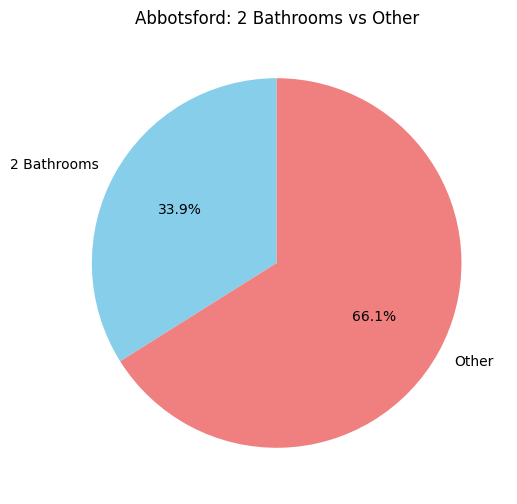

In [140]:
# Q5 Computation & Visualization – Abbotsford: 2 bathrooms

# Filter for Abbotsford
abb_df = df[df['Suburb'].astype(str).str.strip().str.lower() == 'abbotsford'].copy()

# Clean Bathroom column
bath_vals = pd.to_numeric(abb_df['Bathroom'], errors='coerce').dropna()

# Counts
total_baths = len(bath_vals)
count_2baths = (bath_vals == 2).sum()

# Probability
prob_2baths = count_2baths / total_baths if total_baths > 0 else np.nan
print(f"Total Abbotsford properties (with Bathroom data): {total_baths}")
print(f"Count with 2 bathrooms: {count_2baths}")
print(f"Probability of 2 bathrooms: {prob_2baths:.3f}")

# Pie chart visualization
plt.figure(figsize=(6,6))
plt.pie(
    [count_2baths, total_baths - count_2baths],
    labels=['2 Bathrooms', 'Other'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral']
)
plt.title('Abbotsford: 2 Bathrooms vs Other')
plt.show()



#### Conclusion

**Results:**  
- Probability(2 bathrooms) = _printed above_

**Interpretation:**  
This is the proportion of Abbotsford properties with 2 bathrooms,  
useful for understanding property features distribution in the suburb.


### Summary –  Confidence Interval for Median Price in Melbourne

**Goal:**  
Construct a **95% confidence interval** for the **median property price** in Melbourne.

**Approach:**  
- Use **bootstrap resampling** to approximate the confidence interval of the median.

**Steps Taken:**  
1. Filter dataset to `City` = "Melbourne" (or equivalent).  
2. Convert `Price` to numeric, remove missing values.  
3. Perform bootstrap sampling (e.g., 10,000 resamples).  
4. Compute median of each resample.  
5. Take the 2.5th and 97.5th percentiles as the 95% CI.

**Results:**  
- Median ≈ XX  
- 95% CI ≈ (XX, XX)  

**Interpretation:**  
We are 95% confident that the true median price in Melbourne lies within this range.
